Context
This dataset is originally from the National Institute of Diabetes
and Digestive and Kidney Diseases. The objective of the
dataset is to diagnostically predict whether or not a patient has
diabetes, based on certain diagnostic measurements included
in the dataset. Several constraints were placed on the selection
of these instances from a larger database. In particular, all
patients here are females at least 21 years old of Pima Indian
heritage.

Content
The datasets consists of several medical predictor variables and
one target variable, Outcome. Predictor variables includes the
number of pregnancies the patient has had, their BMI, insulin
level, age, and so on.
Predict if this person is diabetic or not:
A 33-Year-old with Pregnancies 0, Glucose 137, BP 40, Skin 35,
Insulin 168, BMI 43.1, DPF 2.288

Prepare your analysis to meet all grading criteria:
1. Check for Missing Values, duplicates, and their treatment (15%)
2. Univariate EDA (10%)
3. Multivariate EDA (10%)
4. Data Preprocessing (encoding and scaling) (15%)
5. Train Test Split (15%)
6. Evaluation Model and Accuracy Score (15%)
7. Prediction Result or Comparison Result (10%)
8. Presentation Quality (10%)
9. Team work ranges from 0.8 to 1.0
(Teamwork score of 0.8 denotes poor teamwork, 1.0 indicates excellent teamwork.)

Guidelines to Perfect Score
1. Explore others Python Notebook available on Kaggle
2. Use only libraries and functions that you understand the “why” and “how”
3. Practice a good story telling principle when presenting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/twiradinata/datasets/main/diabetes.csv'
dfDiabet = pd.read_csv(url)
dfDiabet.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

Check for Missing Values and duplicates and treatment

In [ ]:
dfDiabet.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
dfDiabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dfDiabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dfDiabet.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
dfDiabet.duplicated().sum()

0

In [ ]:
dfDiabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dfDiabet.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
289,5,108,72,43,75,36.1,0.263,33,0
139,5,105,72,29,325,36.9,0.159,28,0
672,10,68,106,23,49,35.5,0.285,47,0
155,7,152,88,44,0,50.0,0.337,36,1
334,1,95,60,18,58,23.9,0.260,22,0


In [ ]:
#the number of 0 values in the datasets
print('Glucose:',dfDiabet[dfDiabet['Glucose']==0].shape[0])
print('Blood Pressure:',dfDiabet[dfDiabet['BloodPressure']==0].shape[0])
print('Skin Thickness:',dfDiabet[dfDiabet['SkinThickness']==0].shape[0])
print('Insulln:',dfDiabet[dfDiabet['Insulin']==0].shape[0])
print('BMI:',dfDiabet[dfDiabet['BMI']==0].shape[0])

Glucose: 5
Blood Pressure: 35
Skin Thickness: 227
Insulln: 374
BMI: 11


In [ ]:
#imputation
dfDiabet['Glucose'] = dfDiabet['Glucose'].replace(0,dfDiabet['Glucose'].mean())
print('Glucose:',dfDiabet[dfDiabet['Glucose']==0].shape[0])
dfDiabet['BloodPressure'] = dfDiabet['BloodPressure'].replace(0,dfDiabet['BloodPressure'].mean())
print('Blood Pressure:',dfDiabet[dfDiabet['BloodPressure']==0].shape[0])
dfDiabet['SkinThickness'] = dfDiabet['SkinThickness'].replace(0,dfDiabet['SkinThickness'].mean())
print('Skin Thickness:',dfDiabet[dfDiabet['SkinThickness']==0].shape[0])
dfDiabet['Insulin'] = dfDiabet['Insulin'].replace(0,dfDiabet['Insulin'].median())
print('Insulin:',dfDiabet[dfDiabet['Insulin']==0].shape[0])
dfDiabet['BMI'] = dfDiabet['BMI'].replace(0,dfDiabet['BMI'].mean())
print('BMI:',dfDiabet[dfDiabet['BMI']==0].shape[0])

Glucose: 0
Blood Pressure: 0
Skin Thickness: 0
Insulin: 0
BMI: 0


Checking outlier

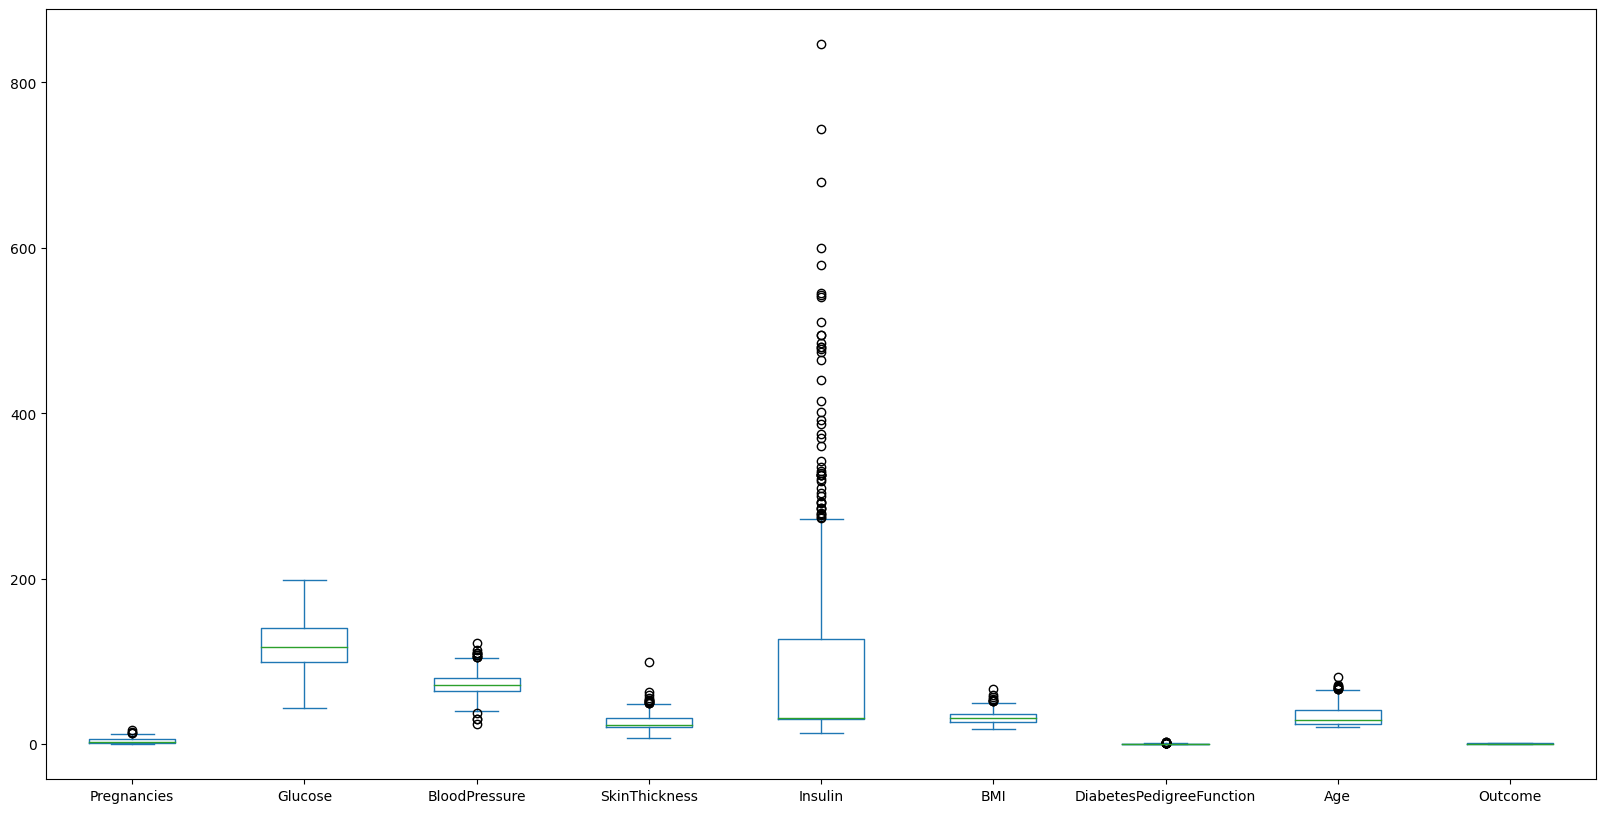

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dfDiabet.plot(kind='box', figsize=(20, 10))
plt.show()

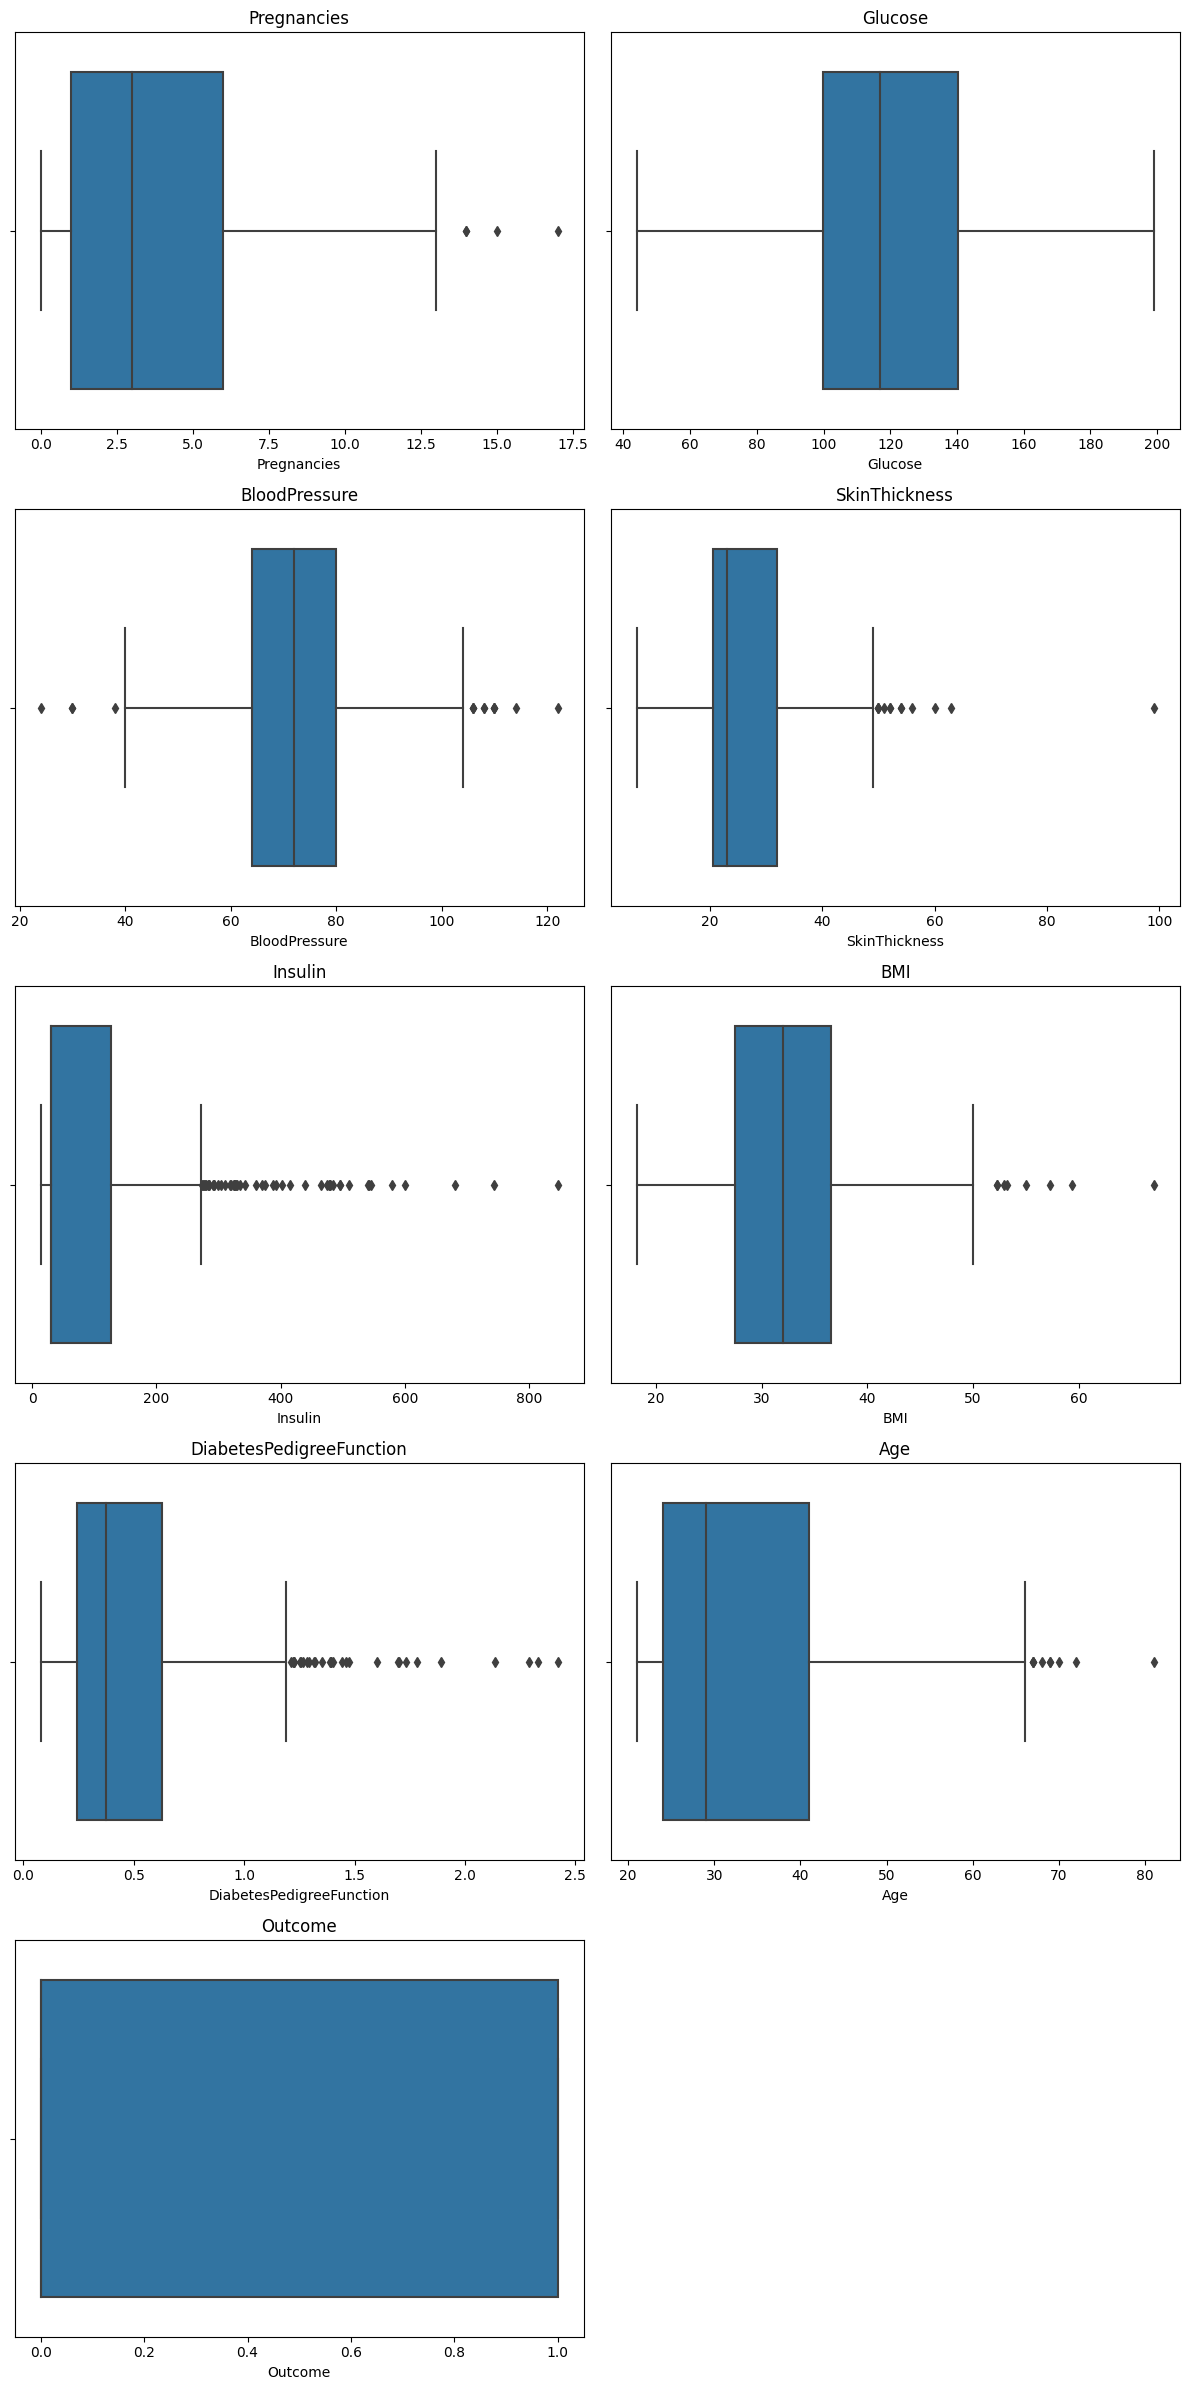

In [ ]:
column_names = dfDiabet.columns
num_subplots = len(column_names)

num_rows = (num_subplots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 24))
axes = axes.flatten()

for i, column in enumerate(column_names):
    sns.boxplot(x=dfDiabet[column], ax=axes[i])
    axes[i].set_title(column)

if num_subplots < len(axes):
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#drop outliers
#pregnancies
Q1=dfDiabet['Pregnancies'].quantile(0.25)
Q3=dfDiabet['Pregnancies'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
dfDiabet = dfDiabet[dfDiabet['Pregnancies']< Upper_Whisker]

# replacing extreme values with less extreme values
from scipy.stats.mstats import winsorize
# Winsorize the 'Glucose' column, capping outliers at the 1st and 99th percentiles
dfDiabet['BloodPressure'] = winsorize(dfDiabet['BloodPressure'], limits=[0.01, 0.01])
dfDiabet['SkinThickness'] = winsorize(dfDiabet['SkinThickness'], limits=[0.01, 0.01])
dfDiabet['Insulin'] = winsorize(dfDiabet['Insulin'], limits=[0.01, 0.01])
dfDiabet['BMI'] = winsorize(dfDiabet['BMI'], limits=[0.01, 0.01])
dfDiabet['DiabetesPedigreeFunction'] = winsorize(dfDiabet['DiabetesPedigreeFunction'], limits=[0.01, 0.01])
dfDiabet['Age'] = winsorize(dfDiabet['Age'], limits=[0.01, 0.01])

<ipython-input-16-f0d99f964e0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDiabet['BloodPressure'] = winsorize(dfDiabet['BloodPressure'], limits=[0.01, 0.01])
<ipython-input-16-f0d99f964e0d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDiabet['SkinThickness'] = winsorize(dfDiabet['SkinThickness'], limits=[0.01, 0.01])
<ipython-input-16-f0d99f964e0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

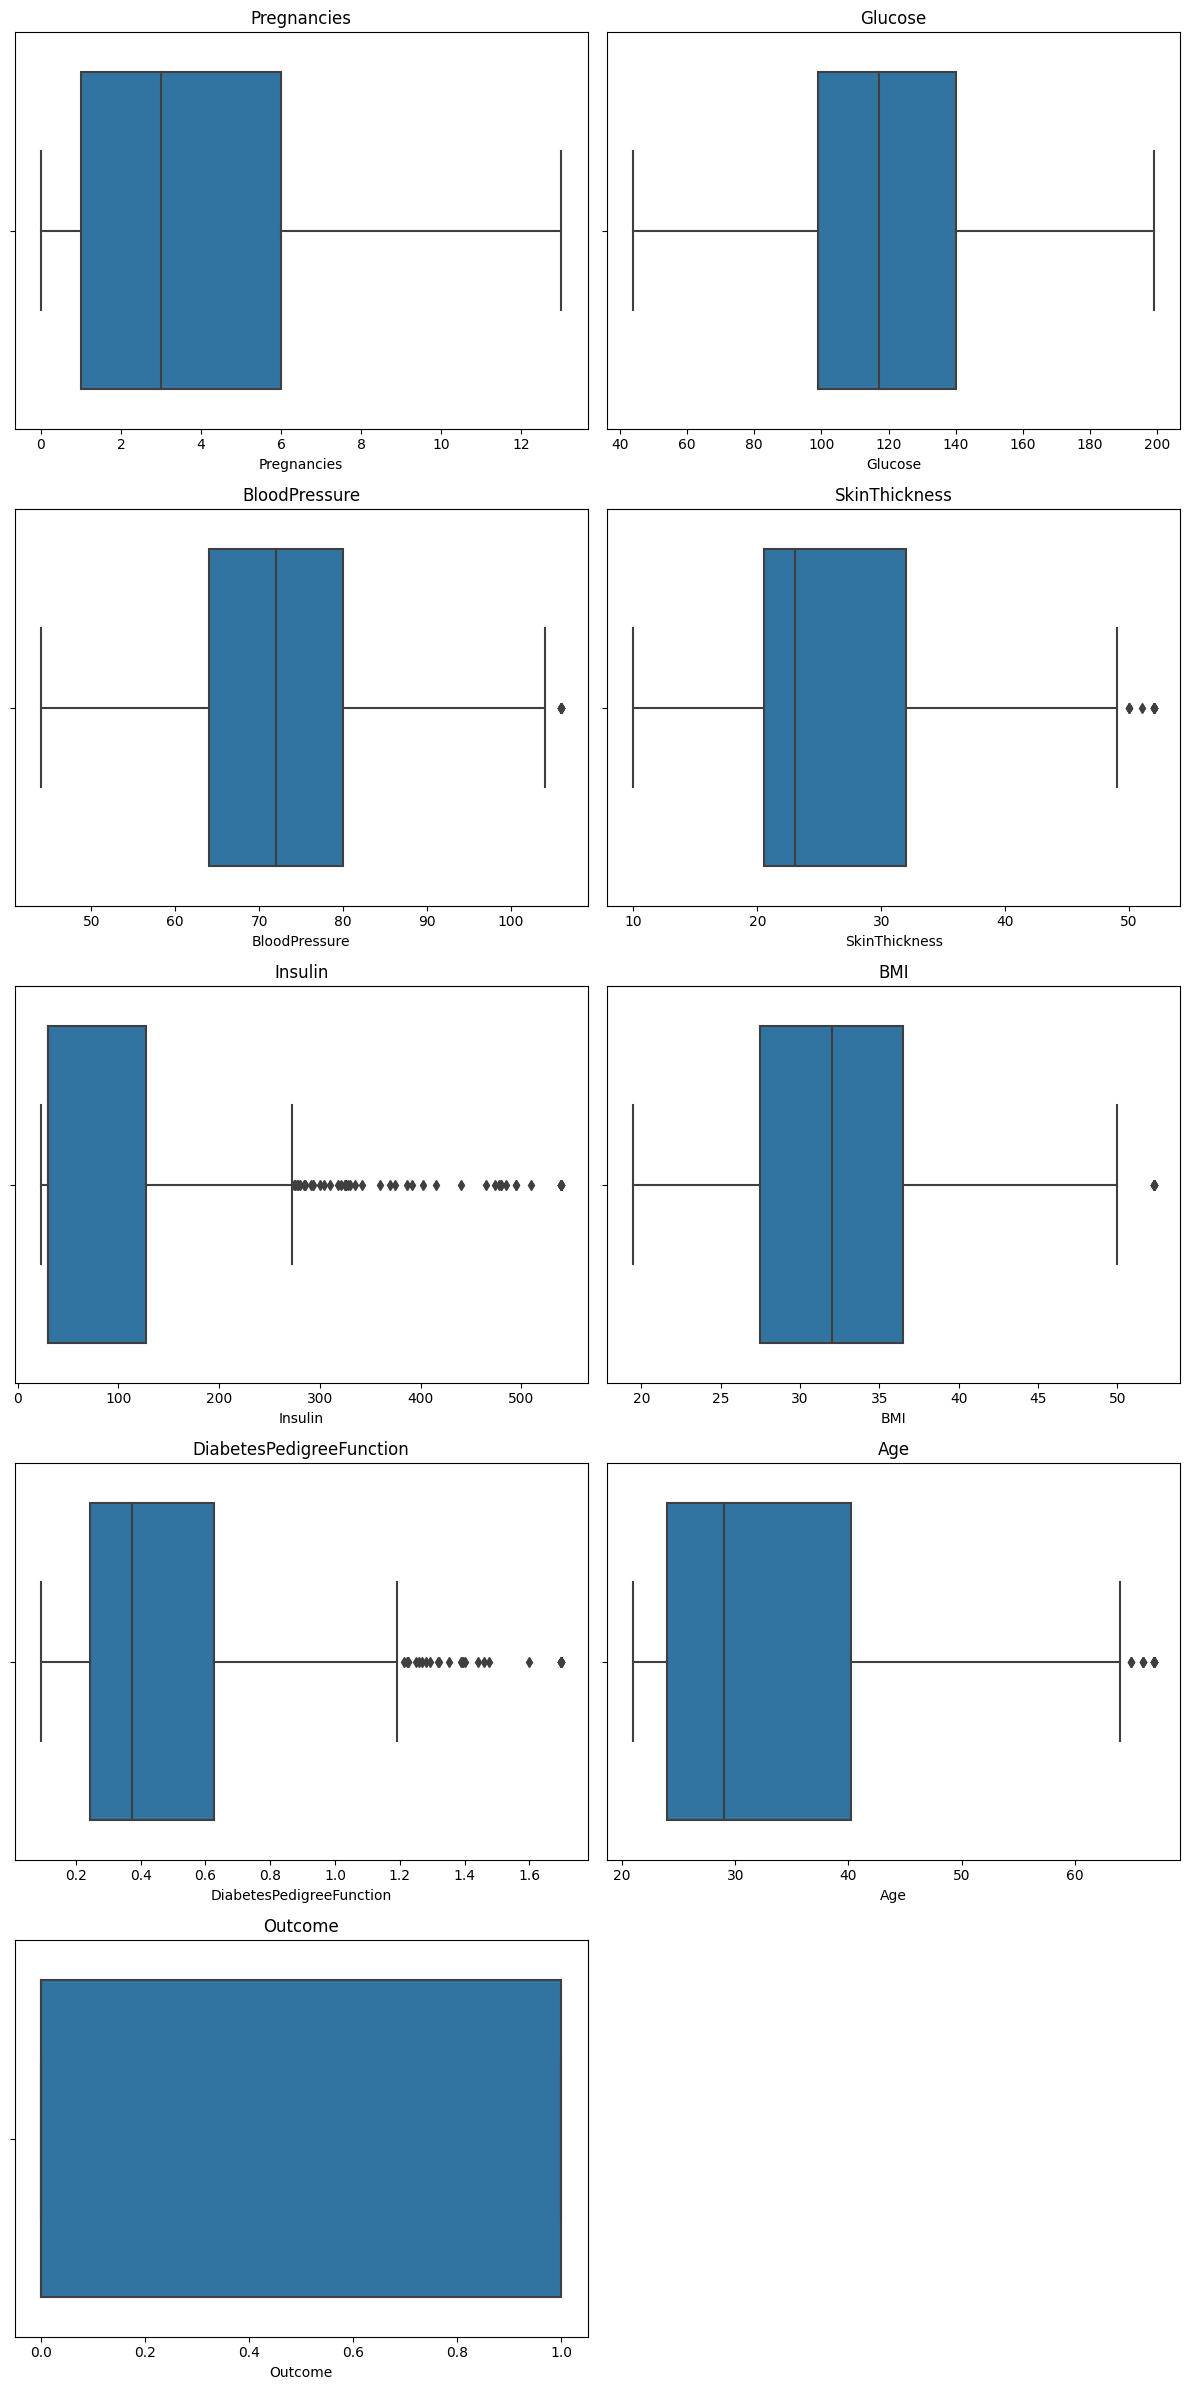

In [ ]:
column_names = dfDiabet.columns
num_subplots = len(column_names)

num_rows = (num_subplots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 24))
axes = axes.flatten()

for i, column in enumerate(column_names):
    sns.boxplot(x=dfDiabet[column], ax=axes[i])
    axes[i].set_title(column)

if num_subplots < len(axes):
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
dfDiabet.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.786649,121.567373,72.287554,26.494471,93.628927,32.393480,0.468806,33.151832,0.345550
std,3.278714,30.403062,11.744945,9.183809,100.402689,6.719523,0.315132,11.649107,0.475859
min,0.000000,44.000000,44.000000,10.000000,23.000000,19.500000,0.092000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,30.500000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,40.250000,1.000000
max,13.000000,199.000000,106.000000,52.000000,540.000000,52.300000,1.699000,67.000000,1.000000


# Univariate EDA

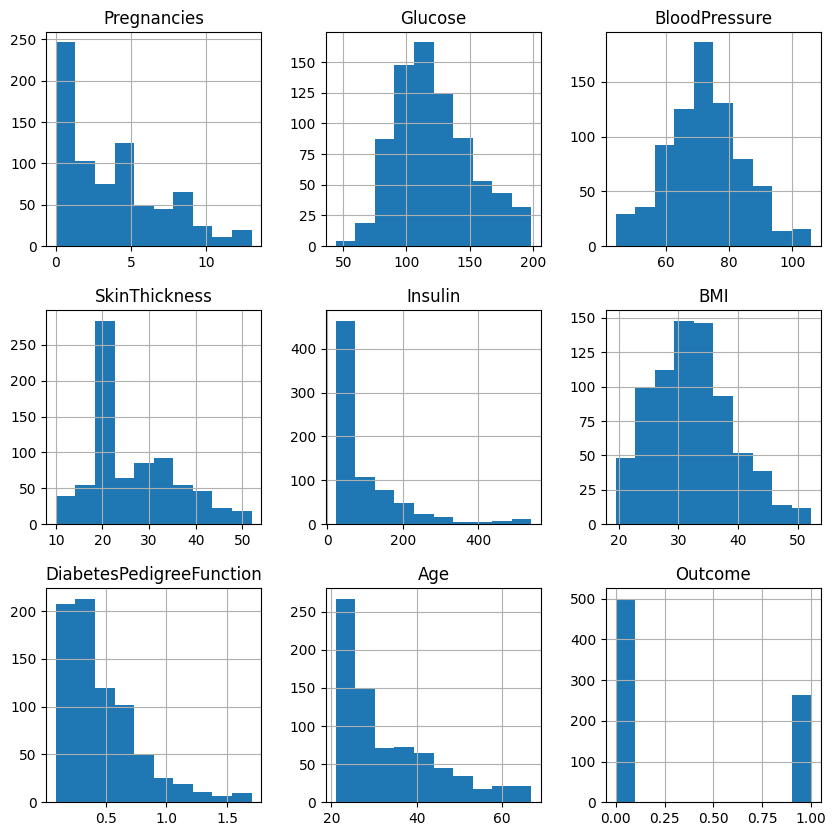

In [ ]:
dfDiabet.hist(figsize=(10,10))
plt.show()

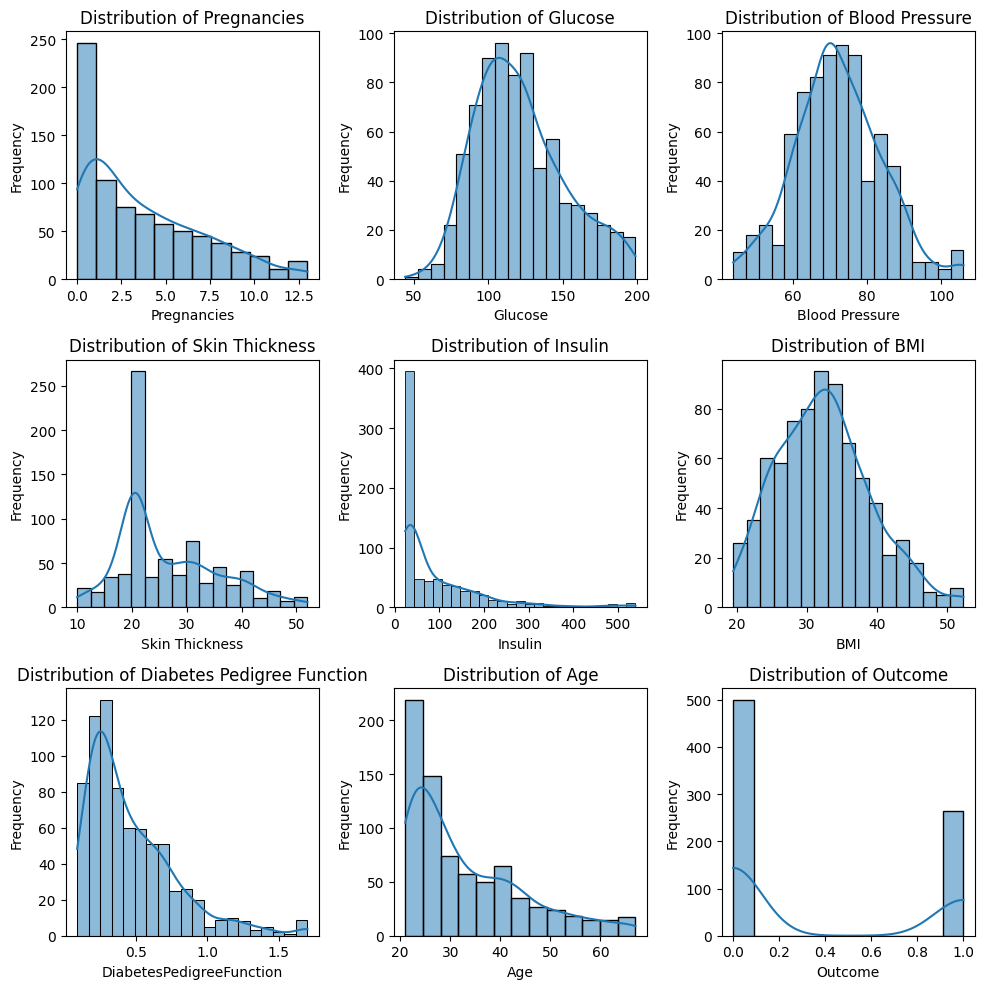

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

sns.histplot(data=dfDiabet, x="Pregnancies", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Pregnancies")
axes[0].set_xlabel("Pregnancies")
axes[0].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="Glucose", kde=True, ax=axes[1])
axes[1].set_title("Distribution of Glucose")
axes[1].set_xlabel("Glucose")
axes[1].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="BloodPressure", kde=True, ax=axes[2])
axes[2].set_title("Distribution of Blood Pressure")
axes[2].set_xlabel("Blood Pressure")
axes[2].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="SkinThickness", kde=True, ax=axes[3])
axes[3].set_title("Distribution of Skin Thickness")
axes[3].set_xlabel("Skin Thickness")
axes[3].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="Insulin", kde=True, ax=axes[4])
axes[4].set_title("Distribution of Insulin")
axes[4].set_xlabel("Insulin")
axes[4].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="BMI", kde=True, ax=axes[5])
axes[5].set_title("Distribution of BMI")
axes[5].set_xlabel("BMI")
axes[5].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="DiabetesPedigreeFunction", kde=True, ax=axes[6])
axes[6].set_title("Distribution of Diabetes Pedigree Function")
axes[6].set_xlabel("DiabetesPedigreeFunction")
axes[6].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="Age", kde=True, ax=axes[7])
axes[7].set_title("Distribution of Age")
axes[7].set_xlabel("Age")
axes[7].set_ylabel("Frequency")

sns.histplot(data=dfDiabet, x="Outcome", kde=True, ax=axes[8])
axes[8].set_title("Distribution of Outcome")
axes[8].set_xlabel("Outcome")
axes[8].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(dfDiabet['Glucose'],y)
plt.show()

NameError: ignored

TypeError: ignored

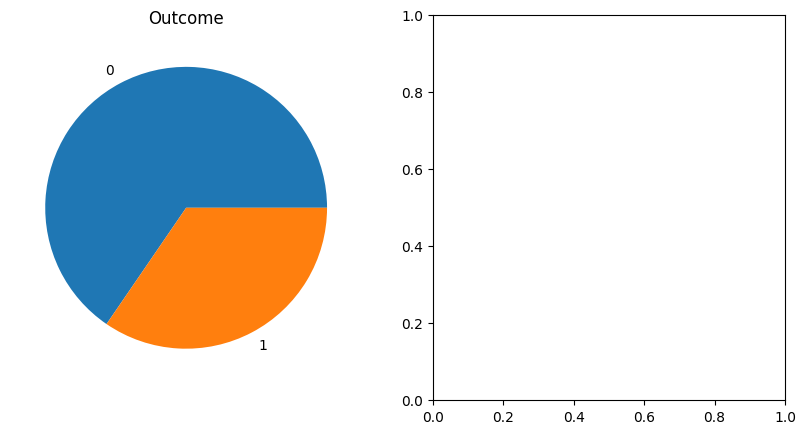

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart
dfDiabet['Outcome'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

# Bar chart
sns.countplot('Outcome', data=dfDiabet, ax=ax[1])
ax[1].set_title('Outcome')

# Calculate and display the counts for each outcome
N, D = dfDiabet['Outcome'].value_counts()
print('Non-diabetic:', N)
print('Diabetic:', D)

plt.tight_layout()
plt.show()


# Multivariate EDA

In [ ]:
dfDiabet.corr()

In [ ]:
sns.heatmap(dfDiabet.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
sns.pairplot(dfDiabet, hue='Outcome')

# Data Preprocessing (Scaling)

In [ ]:
#splitting the data
y = dfDiabet['Outcome'] #dependent variable
X = dfDiabet.drop('Outcome', axis=1) #independent variables
print(y.head())
print(X.head())

In [ ]:
#plt.scatter(dfDiabet['Glucose'],y)
#plt.show()

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_transformed = scaler.transform(X)
scaler_transformed

array([[ 0.67550897,  0.86997631, -0.02449927, ...,  0.17967212,
         0.50232125,  1.447253  ],
       [-0.85047818, -1.20354088, -0.53569201, ..., -0.862751  ,
        -0.3740768 , -0.18484182],
       [ 1.28590383,  2.0219303 , -0.70608959, ..., -1.35417904,
         0.64521223, -0.09894209],
       ...,
       [ 0.37031154, -0.01867392, -0.02449927, ..., -0.92231803,
        -0.71066445, -0.27074155],
       [-0.85047818,  0.14589094, -1.04688474, ..., -0.34153944,
        -0.38042751,  1.18955382],
       [-0.85047818, -0.94023711, -0.19489685, ..., -0.29686416,
        -0.48838958, -0.87203964]])

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_transformed,y,test_size=0.2,random_state=42)

Logistic regression

In [ ]:
#classification model from data training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

K-NN

In [ ]:
#classification model from data training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean", p=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(metric='euclidean')

# Evaluation Model and Accuracy Score

Classification: Logical Regression

Evaluation

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
evaluate = pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})
evaluate.head()

,y_test,y_pred
360,1,1
261,1,0
754,1,1
195,1,1
336,0,0


Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[93, 15],
       [15, 30]], dtype=int64)

<AxesSubplot:>

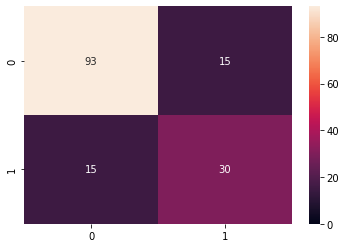

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), vmin=0, annot=True, fmt="d")

In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print("TRUE NEGATIVE: ",TN)
print("FALSE POSITIVE:",FP)
print("FALSE NEGATIVE: ",FN)
print("TRUE POSITIVE: ", TP)

TRUE NEGATIVE:  93
FALSE POSITIVE: 15
FALSE NEGATIVE:  15
TRUE POSITIVE:  30


In [ ]:
print("Accuracy score of Logistic regression: ", (TP+TN) / (TP+FP+TN+FN))

Accuracy score of Logistic regression:  0.803921568627451


In [ ]:
accuracy_score(y_test,y_pred)

0.803921568627451

Classification: KNN

Evaluation

In [ ]:
y_pred = knn.predict(X_test)
comparison_table = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
comparison_table.tail|()

,y_test,y_pred
360,1,1
261,1,1
754,1,1
195,1,1
336,0,0


Accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[87, 21],
       [14, 31]], dtype=int64)

<AxesSubplot:>

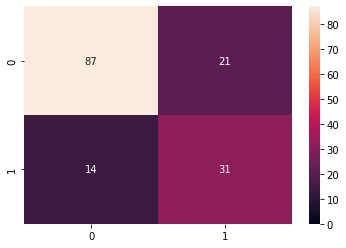

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), vmin=0, annot=True, fmt="d")

In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print("TRUE NEGATIVE: ",TN)
print("FALSE POSITIVE:",FP)
print("FALSE NEGATIVE: ",FN)
print("TRUE POSITIVE: ", TP)

TRUE NEGATIVE:  87
FALSE POSITIVE: 21
FALSE NEGATIVE:  14
TRUE POSITIVE:  31


In [ ]:
print("Accuracy score KNN: ", (TP+TN) / (TP+FP+TN+FN))

Accuracy score KNN:  0.7712418300653595


In [ ]:
accuracy_score(y_test,y_pred)

0.7712418300653595

# Prediction Result or Comparison Result

In [ ]:
from sklearn.preprocessing import StandardScaler
dataToPredict = {'Pregnancies': [0],
        'Glucose': [137],
        'BloodPressure': [40],
        'SkinThickness': [35],
        'Insulin': [168],
        'BMI': [43.1],
        'DiabetesPedigreeFunction': [2.288],
        'Age':[33]}
dfToPredict = pd.DataFrame(dataToPredict)



scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on your training data

# Now you can transform the new data
scaled_data = scaler.transform(dfToPredict)

# Make predictions using the scaled data
prediction = classifier.predict(scaled_data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Logical regression

In [ ]:
# Load the trained logistic regression model (assuming 'classifier' is the trained model)
model = classifier

# Make the prediction
prediction = model.predict(scaled_data)

# Map the prediction to a label
if prediction[0] == 0:
    result = "Not Diabetic"
else:
    result = "Diabetic"

# Print the prediction result
print("Prediction: This person is", result)

Prediction: This person is Diabetic


KNN

In [ ]:
model = knn

# Make the prediction
prediction = model.predict(scaled_data)

# Map the prediction to a label
if prediction[0] == 0:
    result = "Not Diabetic"
else:
    result = "Diabetic"

# Print the prediction result
print("Prediction: This person is", result)

Prediction: This person is Diabetic
